In [30]:
import pandas as pd
from math import sqrt
import numpy as np
import importlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import sys
import os

# Get the absolute path to the 'src' directory
sys.path.append(os.path.abspath("../.."))
print(os.path.abspath("../.."))
project_root = os.path.abspath("../..")
print(sys.path)
print(project_root)

/home/julia/school/bakalarka/hospital_sim
['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages', '/home/julia/school/bakalarka/hospital_sim']
/home/julia/school/bakalarka/hospital_sim


In [ ]:
# graph_path = "../../input/layouts/toScaleLayout.json"
# people_path = "../../input/people/manyPeople.json"
# event_path = "../../input/events/reqReorder.json"
# nurse_log_path = "../../output/nurseLog.csv"
# event_log_path = "../../output/eventLog.csv"

In [3]:
# import src.data_generator as dg
# import src.main
# importlib.reload(src.main)
from src.main import App
from src.data_generator import DataGenerator
from src.process_data import DataProcessor

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
exp_layout = "../../input/layouts/expLayout.json"
two_nurses = "../../input/people/expPeople1.json" #two nurses, 4 patients each, 2 patients per room
one_nurse = project_root + "/input/people/expOneNurse.json"
exp_nurse_log = project_root + "/output/expNurseLog.csv"
exp_event_log = project_root + "/output/expEventLog.csv"
event_paths = ["expEvents1.json",
"expEvents2.json",
"expEvents3.json",
"expEvents4.json",
"expEvents5.json",
"expEvents6.json",
"expEvents7.json",
"expEvents8.json",]

In [5]:
full_event_paths = list(map(lambda x: project_root + "/input/events/" + x, event_paths))
print(full_event_paths)


['/home/julia/school/bakalarka/hospital_sim/input/events/expEvents1.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents2.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents3.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents4.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents5.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents6.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents7.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents8.json']


In [6]:
params1 = {"event_path" : full_event_paths[0], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "basic", "include_plans": True}
params2 = {"event_path" : full_event_paths[1], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "other", "include_plans": True}
params3 = {"event_path" : full_event_paths[2], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "basic", "include_plans": True}
params4 = {"event_path" : full_event_paths[3], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "other", "include_plans": True}
params5 = {"event_path" : full_event_paths[4], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "basic", "include_plans": False}
params6 = {"event_path" : full_event_paths[5], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "other", "include_plans": False}
params7 = {"event_path" : full_event_paths[6], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "basic", "include_plans": False}
params8 = {"event_path" : full_event_paths[7], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "other", "include_plans": False}
params_lst = [params1, params2, params3, params4, params5, params6, params7, params8]

In [7]:
def generate_exp(params):
    # exp_events = project_root + "/input/events/" + exp_event_path
    # if nurse_cnt == 1:
    #     people_file = one_nurse
    # elif nurse_cnt == 2:
    #     people_file = two_nurses
    event_gen = DataGenerator(rnd=42, layout_file=exp_layout, people_file=params["people_path"], out_file=params["event_path"], request_assigner=params["request_assigner"],
                               include_plans=params["include_plans"])
    event_gen.create_events() 

In [8]:
def run_exp(params):
    app = App(exp_layout, params["people_path"], params["event_path"], exp_nurse_log, exp_event_log)
    app.run_simulation()

In [16]:
def process_nurse_data(params):
    dp = DataProcessor(exp_nurse_log, exp_event_log, params["people_path"])
    all_results = []
    for i in range(params["nurse_cnt"]):
        nurse_results = {}
        nurse_results["nurse_dst_walked"] = dp.nurse_dst_walked(i)
        nurse_results["nurse_time_walked"] = dp.nurse_time_walked(i)
        nurse_results["nurse_time_at_own_patients"] = dp.nurse_time_at_own_patients(i)
        nurse_results["nurse_time_at_other_patients"] = dp.nurse_time_at_other_patients(i)
        nurse_results["nurse_time_resting"] = dp.nurse_time_resting(i)
        all_results.append(nurse_results)
    return all_results

In [ ]:
for params in params_lst:
    generate_exp(params)

In [17]:
nurse_results = []
done = []
for i, params in enumerate(params_lst):  
    run_exp(params)
    done.append(i)
    exp_results = process_nurse_data(params)
    nurse_results.append(exp_results)

importing
{'time': 2867.554752696838, 'event': 1125, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2155.170543109332, 'event': 1126, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 359.9096969448104, 'event': 1127, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2164.0140422755517, 'event': 1128, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 3491.6754677831796, 'event': 1129, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 2}
{'time': 654.5698819455622, 'event': 1130, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 2201.9513777578113, 'event': 1131, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 1048.4249047129508, 'event': 1132, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'

AttributeError: 'NoneType' object has no attribute 'event'

In [12]:
print(done)

[0, 1, 2, 3]


In [18]:
for res in nurse_results:
    print(res)

[{'nurse_dst_walked': 218.0, 'nurse_time_walked': np.float64(218.0), 'nurse_time_at_own_patients': np.float64(2729.925981804981), 'nurse_time_at_other_patients': 0, 'nurse_time_resting': np.float64(1654.8915498724905)}, {'nurse_dst_walked': 320.0, 'nurse_time_walked': np.float64(320.0), 'nurse_time_at_own_patients': np.float64(3566.151891352622), 'nurse_time_at_other_patients': 0, 'nurse_time_resting': np.float64(716.6656403248494)}]
[{'nurse_dst_walked': 184.0, 'nurse_time_walked': np.float64(184.0), 'nurse_time_at_own_patients': np.float64(1086.1733966317145), 'nurse_time_at_other_patients': np.float64(435.50261512903575), 'nurse_time_resting': np.float64(1806.5770403503761)}, {'nurse_dst_walked': 133.0, 'nurse_time_walked': np.float64(133.0), 'nurse_time_at_own_patients': np.float64(1197.678855458601), 'nurse_time_at_other_patients': np.float64(510.2978201533394), 'nurse_time_resting': np.float64(1671.2763764991857)}]
[{'nurse_dst_walked': 923.4145994955186, 'nurse_time_walked': np.

['Exp 0', 'Exp 1', 'Exp 2', 'Exp 3']
[218.0, 320.0, 184.0, 133.0, 923.4145994955186, 0, 220.0, 0]


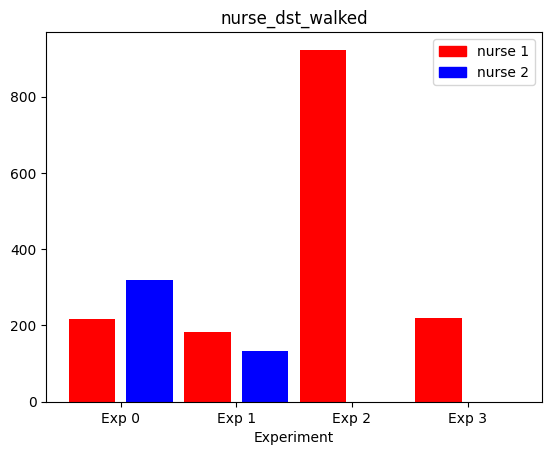

['Exp 0', 'Exp 1', 'Exp 2', 'Exp 3']
[np.float64(218.0), np.float64(320.0), np.float64(184.0), np.float64(133.0), np.float64(923.4145994955186), 0, np.float64(220.0), 0]


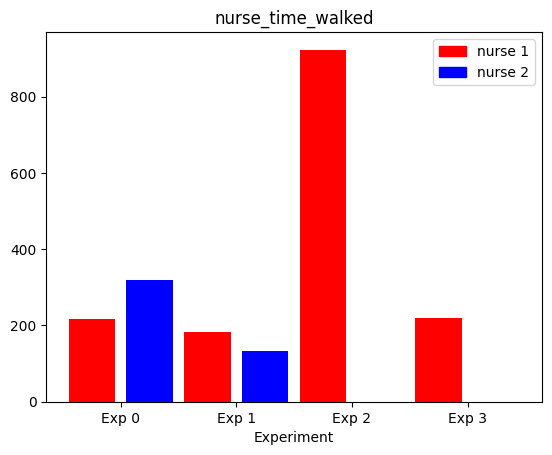

['Exp 0', 'Exp 1', 'Exp 2', 'Exp 3']
[np.float64(2729.925981804981), np.float64(3566.151891352622), np.float64(1086.1733966317145), np.float64(1197.678855458601), np.float64(6333.445313102287), 0, np.float64(1831.6931639020427), 0]


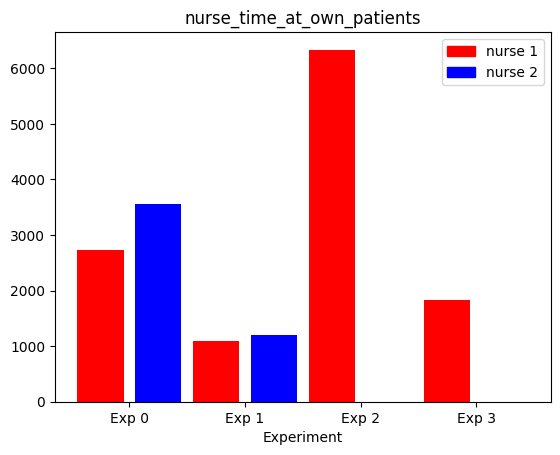

['Exp 0', 'Exp 1', 'Exp 2', 'Exp 3']
[0, 0, np.float64(435.50261512903575), np.float64(510.2978201533394), 0, 0, 0, 0]


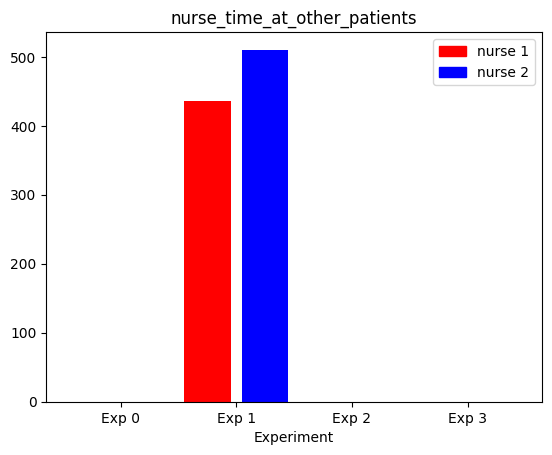

['Exp 0', 'Exp 1', 'Exp 2', 'Exp 3']
[np.float64(1654.8915498724905), np.float64(716.6656403248494), np.float64(1806.5770403503761), np.float64(1671.2763764991857), np.float64(1208.5725537930532), 0, np.float64(1463.5598882090835), 0]


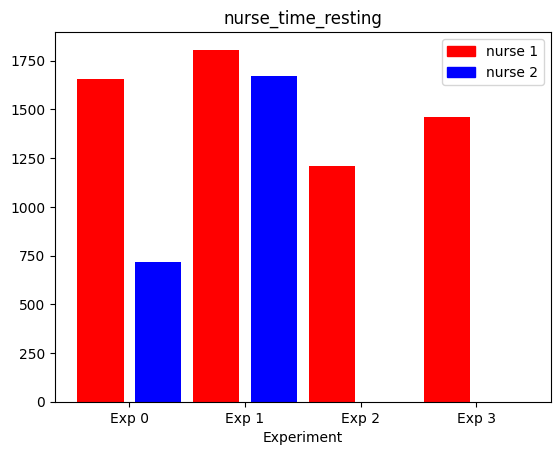

In [38]:
def plot_nurse_stat(stat_name):
    values = []
    for res in nurse_results:
        values.append(res[0][stat_name])
        if len(res) == 2:
            values.append(res[1][stat_name])
        else:
            values.append(0)

    labels = ["Exp " + str(x) for x in range(4)]
    colors = ['red' if i % 2 == 0 else 'blue' for i in range(len(values))]
    print(labels)
    print(values)
    x = np.arange(len(values))

    plt.bar(x, values, color=colors)

    plt.xticks(ticks=np.arange(0.5, len(values), 2), labels=labels)

    # red_patch = plt.Line2D([0], [0], color='red', lw=4, label='nurse 1')
    # blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='nurse 2')
    red_patch = mpatches.Circle((0, 0), radius=0.1, color='red', label='nurse 1')
    blue_patch = mpatches.Circle((0, 0), radius=0.1, color='blue', label='nurse 2')
    plt.legend(handles=[red_patch, blue_patch])

    # Customize chart
    plt.xlabel("Experiment")
    plt.ylabel("")
    plt.title(stat_name)

    # Show the chart
    plt.show()

nurse_stats = nurse_results[0][0].keys()
for stat in nurse_stats:
    plot_nurse_stat(stat)

In [31]:
print(results1)

{'nurse_dst_walked0': 218.0, 'nurse_time_walked0': np.float64(218.0), 'nurse_time_at_own_patients0': np.float64(2729.925981804981), 'nurse_time_at_other_patients0': 0, 'nurse_time_resting0': np.float64(1654.8915498724905), 'nurse_dst_walked1': 320.0, 'nurse_time_walked1': np.float64(320.0), 'nurse_time_at_own_patients1': np.float64(3566.151891352622), 'nurse_time_at_other_patients1': 0, 'nurse_time_resting1': np.float64(716.6656403248494)}
